# Naive Bayes Classifier

# Objective:
To filter mobile phone spam using the Naive Bayes algorithm

# Dataset: sms_spam.csv
https://github.com/stedy/Machine-Learning-with-R-datasets

# 1. Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

import math
import string
import statsmodels.api as sm
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 2. Load data

In [2]:
data = pd.read_csv('spamsms.csv',encoding = 'latin-1')

# 3. Exploring and preparing the data 

In [3]:
data.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.isnull().sum()

type    0
text    0
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

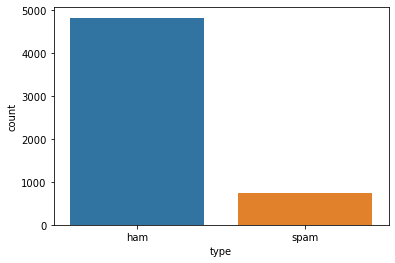

In [9]:
sns.countplot(data['type'])

<AxesSubplot:ylabel='type'>

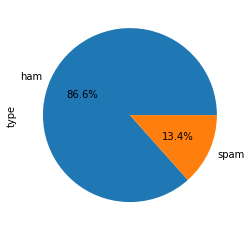

In [10]:
data['type'].value_counts().plot(kind='pie', autopct="%.1f%%")

In [11]:
data['length'] = ''

In [12]:
for i in range(0,len(data)):
    data['length'][i] = len(data['text'][i])

In [13]:
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 4. Prepare the data by splitting the text documents into words and also create indicator feature for frequent words


In [14]:
def text_process (x):
    return x.split()
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])
print(len(bow_transformer.vocabulary_))

15585


In [19]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 5. Create training and test datasets

In [16]:
data['length'] = data['text'].apply(lambda x: len(x))
data = data[data['length']>0]

In [17]:
x_train = data[:4168]['text']
y_train = data[:4168]['type']
x_test = data[4168:]['text']
y_test = data[4168:]['type']

# 6. Create indicator features for frequent words

In [18]:
messages_bow = bow_transformer.transform(x_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(4168, 15585)


# 7. Train a model on the data

In [20]:
nb = MultinomialNB()

In [21]:
model = nb.fit(messages_tfidf, y_train)

# 8. Evaluate model performance

In [22]:
messages_bow = bow_transformer.transform(x_test)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1404, 15585)


In [23]:
y_pred = model.predict(messages_tfidf)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [24]:
print(confusion_matrix(y_test,y_pred))

[[1222    0]
 [  80  102]]


In [25]:
print(accuracy_score(y_test, y_pred))

0.9430199430199431


# 9. Measure performance for classifcation

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1222
        spam       1.00      0.56      0.72       182

    accuracy                           0.94      1404
   macro avg       0.97      0.78      0.84      1404
weighted avg       0.95      0.94      0.94      1404

